In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

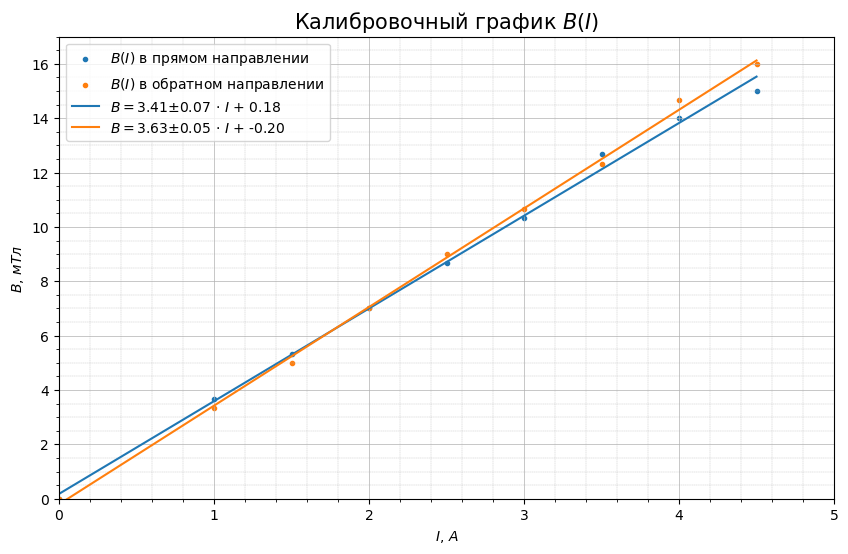

In [3]:
data = pd.read_excel('3.3.1.xlsx', sheet_name='Магнит_поле')
names = list(data)

Idir = data[names[0]]
Bdir = data[names[4]]
Irev = data[names[6]]
Brev = data[names[10]]

kdir, covdir = np.polyfit(Idir, Bdir, 1, cov=True)
Bdirp = np.polyval(kdir, Idir)
krev, covrev = np.polyfit(Irev, Brev, 1, cov=True)
Brevp = np.polyval(krev, Irev)

fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

ax.scatter(Idir, Bdir, label ='$B(I)$ в прямом направлении', marker='.')
ax.scatter(Irev, Brev, label ='$B(I)$ в обратном направлении', marker='.')
ax.plot(Idir, Bdirp, label='$B = $' + '{:.2f}$\pm${:.2f}'.format(kdir[0], np.sqrt(covdir[0][0])) + '$\,\cdot\, I$' + ' + {:.2f}'.format(kdir[1]))
ax.plot(Irev, Brevp, label='$B = $' + '{:.2f}$\pm${:.2f}'.format(krev[0], np.sqrt(covrev[0][0])) + '$\,\cdot\, I$' + ' + {:.2f}'.format(krev[1]))

ax.legend(loc='upper left', fontsize=10)

ax.grid(which="major", linewidth=0.5)
ax.grid(which="minor", linestyle='--', linewidth=0.25)
plt.minorticks_on()

ax.axis([0, 5, 0, 17])

ax.set_title('Калибровочный график $B(I)$', loc='center', fontsize=15)
ax.set_xlabel('$I,\, А$', loc='center', fontsize=10)
ax.set_ylabel('$B,\, мТл$', loc='center', fontsize=10)

plt.show()

fig.savefig("3.3.1_1.png", dpi=500)

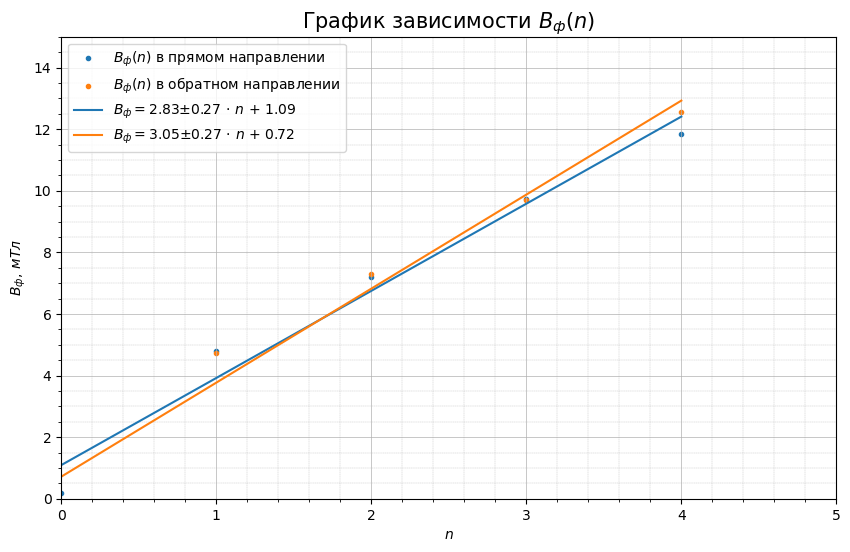

In [6]:
data = pd.read_excel('3.3.1.xlsx', sheet_name='Фокусы')
names = list(data)

ndir = data[names[0]]
Indir = data[names[1]]
nrev = data[names[3]]
Inrev = data[names[4]]

Bndir = np.polyval(kdir, Indir)
Bnrev = np.polyval(krev, Inrev)

kndir, covndir = np.polyfit(ndir, Bndir, 1, cov=True)
Bndirp = np.polyval(kndir, ndir)
knrev, covnrev = np.polyfit(nrev, Bnrev, 1, cov=True)
Bnrevp = np.polyval(knrev, nrev)

fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

ax.scatter(ndir, Bndir, label ='$B_ф(n)$ в прямом направлении', marker='.')
ax.scatter(nrev, Bnrev, label ='$B_ф(n)$ в обратном направлении', marker='.')
ax.plot(ndir, Bndirp, label='$B_ф = $' + '{:.2f}$\pm${:.2f}'.format(kndir[0], np.sqrt(covndir[0][0])) + '$\,\cdot\, n$' + ' + {:.2f}'.format(kndir[1]))
ax.plot(nrev, Bnrevp, label='$B_ф = $' + '{:.2f}$\pm${:.2f}'.format(knrev[0], np.sqrt(covnrev[0][0])) + '$\,\cdot\, n$' + ' + {:.2f}'.format(knrev[1]))

ax.legend(loc='upper left', fontsize=10)

ax.grid(which="major", linewidth=0.5)
ax.grid(which="minor", linestyle='--', linewidth=0.25)
plt.minorticks_on()

ax.axis([0, 5, 0, 15])

ax.set_title('График зависимости $B_ф(n)$', loc='center', fontsize=15)
ax.set_xlabel('$n$', loc='center', fontsize=10)
ax.set_ylabel('$B_ф,\, мТл$', loc='center', fontsize=10)

plt.show()

fig.savefig("3.3.1_2.png", dpi=500)

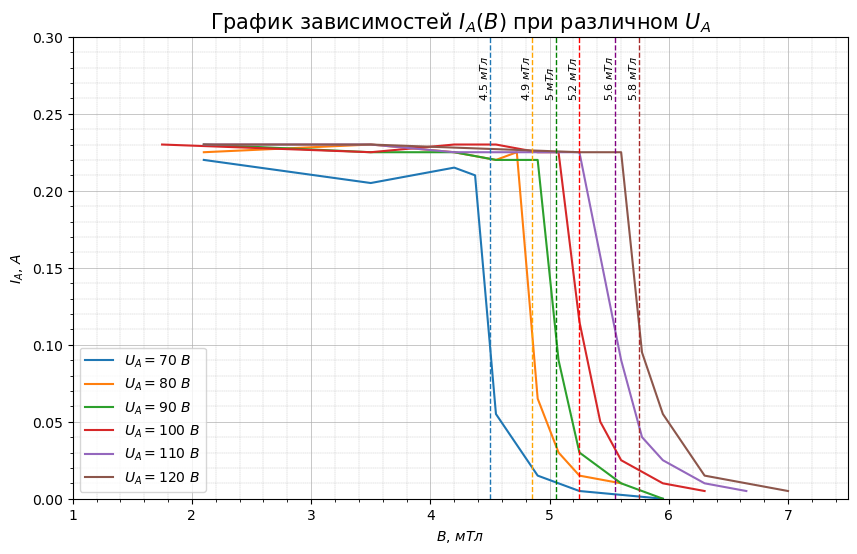

In [9]:
Ua = ['70В', '80B', '90B', '100B', '110B', '120B']

fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

for i in Ua:
    data = pd.read_excel('3.3.1.xlsx', sheet_name=i)
    names = list(data)

    B = data[names[2]]
    Ia = data[names[4]]

    ax.plot(B, Ia, label=f'$U_A = {i[:-1]}~B$')
    
ax.legend(loc='lower left', fontsize=10)

ax.grid(which="major", linewidth=0.5)
ax.grid(which="minor", linestyle='--', linewidth=0.25)
plt.minorticks_on()

ax.axis([1, 7.5, 0, 0.3])

ax.set_title('График зависимостей $I_A(B)$ при различном $U_A$', loc='center', fontsize=15)
ax.set_xlabel('$B,\, мТл$', loc='center', fontsize=10)
ax.set_ylabel('$I_A,\, A$', loc='center', fontsize=10)

ax.vlines(4.5, 0, 0.3, linestyle='dashed', linewidth=1)
ax.text(4.4, 0.26, "$4.5~мТл$", fontsize=8, rotation='vertical')
ax.vlines(4.85, 0, 0.3, linestyle='dashed', linewidth=1, color='orange')
ax.text(4.75, 0.26, "$4.9~мТл$", fontsize=8, rotation='vertical')
ax.vlines(5.05, 0, 0.3, linestyle='dashed', linewidth=1, color='green')
ax.text(4.95, 0.26, "$5~мТл$", fontsize=8, rotation='vertical')
ax.vlines(5.25, 0, 0.3, linestyle='dashed', linewidth=1, color='red')
ax.text(5.15, 0.26, "$5.2~мТл$", fontsize=8, rotation='vertical')
ax.vlines(5.55, 0, 0.3, linestyle='dashed', linewidth=1, color='purple')
ax.text(5.45, 0.26, "$5.6~мТл$", fontsize=8, rotation='vertical')
ax.vlines(5.75, 0, 0.3, linestyle='dashed', linewidth=1, color='brown')
ax.text(5.65, 0.26, "$5.8~мТл$", fontsize=8, rotation='vertical')

plt.show()

fig.savefig("3.3.1_3.png", dpi=500)

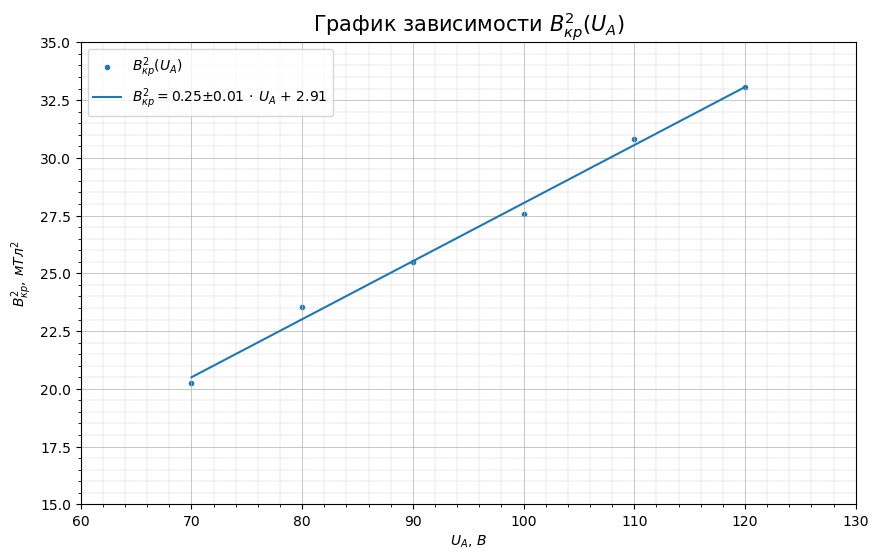

In [10]:
Bkr = (np.array([4.5, 4.85, 5.05, 5.25, 5.55, 5.75])) ** 2
Ua = [70, 80, 90, 100, 110, 120]

k, cov = np.polyfit(Ua, Bkr, 1, cov=True)
Bkrp = np.polyval(k, Ua)

fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

ax.scatter(Ua, Bkr, label ='$B^2_{кр}(U_A)$', marker='.')
ax.plot(Ua, Bkrp, label='$B^2_{кр} = $'  + '{:.2f}$\pm${:.2f}'.format(k[0], np.sqrt(cov[0][0])) + '$\,\cdot\, U_A$' + ' + {:.2f}'.format(k[1]))

ax.legend(loc='upper left', fontsize=10)

ax.grid(which="major", linewidth=0.5)
ax.grid(which="minor", linestyle='--', linewidth=0.25)
plt.minorticks_on()

ax.axis([60, 130, 15, 35])

ax.set_title('График зависимости $B^2_{кр}(U_A)$', loc='center', fontsize=15)
ax.set_xlabel('$U_A,\, B$', loc='center', fontsize=10)
ax.set_ylabel('$B^2_{кр},\, мТл^2$', loc='center', fontsize=10)

plt.show()

fig.savefig("3.3.1_4.png", dpi=500)